# 第八章 列联表分析 （配送与满意度分析）

在进行网购的时候，商家会根据自身情况选择不同的物流公司进行配送，客户会根据自身的体验，对物流产生不同的满意度。物流公司和客户满意与否，这些都属于分类数据，如何判断分类数据是否有关，以及如何解释这些关系，需要在本章中进行列联表分析的相关学习。

## 8.1 列联表分析的基本原理


### 8.1.1 分类数据【2】
在前面章节中曾提出过统计数据的类型有分类数据、顺序数据和数值型数据。分类数据是对事物进行分类的结果，其特征是，调查结果虽然用数值表示，但不同数值描述了调查对象的不同特征。<p>
例如，在研究消费者对物流公司与配送满意度之间的关系时，物流公司是一个分类数据，可以分为A公司、B公司和C公司，如果调查结果为“1”（“2”或“3”），则表示消费者的快递由A（B或C）公司运输配送。同样的，消费者的满意度也可以分类，“满意”和“不满意”，分别用“1”和“2”表示。对这类问题的分析实在汇总数据的基础上进行的，数据汇总的结果表现为频数，如调查对象中，A公司配送32单，其中“满意”单数为21，“不满意”单数为11。

### 8.1.2 ${\chi}^2$统计量【1，2】

$\chi^2$统计量是由英国统计学家K.Pearson 于1900年提出，因此，拟合优度检验也称为Pearson $\chi^2$。这里结合本章研究的配送与满意度问题，讨论$\chi^2$统计量的应用。$\chi^2$可以用于测定两个分类变量之间的相关程度。若用$f_0$表示观察值频数（observed frequency），用$f_e$表示期望值频数（expected frequency），则$$统计量计算公式如下：

$$\chi^2=\sum{\frac{(f_0-f_e)^2}{f_e}}$$

式中,统计量服从自由度为k-1的 $\chi^2$分布，k为类别个数。

$\chi^2$统计量有如下特征：首先，$\chi^2≥0$，因为它是对平方结果的汇总；其次，$\chi^2$统计量的分布与自由度有关；最后，$\chi^2$统计量描述了观察值与期望值的接近程度。两者越接近，即$f_0-f_e$的绝对值越小，计算出的$\chi^2$值就越小；反之，$f_0-f_e$的绝对值越大，计算出的$\chi^2$值也越大。$\chi^2$检验正是通过对$\chi^2$的计算结果与$\chi^2$分布中的临界值进行比较，作出是否拒绝原假设的统计决策。<p>
利用$\chi^2$统计量，可以对分类数据进行拟合优度检验和独立性检验。

## 8.2 拟合优度检验【1，2】

拟合优度检验 (goodness of fit test)是用$\chi^2$统计量进行统计显著性验的重要内容之一。它是依据总体分布状况，计算出分类变量中各类别的期望频数，与分布的观察频数进行对比，判断期望频数与观察频数是否有显著差异，从而达到对分类变量进行分析的目的。

为了更好地理解拟合优度检验，我们先从一个例子开始。<p>
**【例8-1】**<br>
为研究消费者对负责配送的物流公司是否有明显偏好，一家调查公司随机调查了2000个消费者对4家物流公司的偏好情况，得到对不同公司的偏好数据如下所示：

|    |物流公司| 人数 |
|:---:| :---:  | :---:|
|  1  | 公司A  |  525 |
|  2  | 公司B  |  550 |
|  3  | 公司C  |  470 |
|  4  |  其他  |  455 |

从例子可以看出，物流公司是一个分类型变量，共有四个类别（水平），每个类别的偏好人数称为观察频数(observed frequency)，即各类别中的实际频数。如果消费者对各物流公司没有明显偏好，即选择各类别的概率相等，也就是总人数除以类别数，即：2000/4=500，这就是各个类别的期望频数。
调查者想分析消费者对不同物流公司的偏好是否有显著差异，实际上也就是检验观察频数与期望频数是否一致，因此也称为一致性检验(test of homogeneity)。

### 8.2.1 期望频数相等
例子8-1的解题步骤如下：<p>
**第一步：提出原假设**<br>
假设<br>
H0:观察频数与期望频数无显著差异(无显著偏好)<br>
H1:观察频数与期望频数有显著差异(有显著偏好)<p>
**第二步：计算$\chi^2$统计量**<br>
其计算过程如下所示：

|物流公司|观察频数$f_0$|期望频数$f_e$|${(f_0-f_e)^2}/{f_e}$|
|:---:|:---:|:---:|:---:|
|公司A| 525 | 500 |1.25<div style="width: 80pt">|
|公司B| 550 | 500 |5.00|
|公司C| 470 | 500 |1.80|
|其他 | 455 | 500 |4.05|
|合计 | 2000| 500 |12.10|

**第三步：做出决策**<br>
由于$\chi^2$ = 12.10，自由度为4-1=3，根据Python函数计算P值为0.007048。由于P值<$\alpha$，拒绝$H_0$，表明消费者对不同类型饮料的偏好有显著差异。<br>

In [3]:
import pandas as pd
from pandas import set_option
from scipy import stats

#数据读入
df = pd.read_excel("data.xlsx",sheet_name = "8-1",index_col=0)
print(df)

df['人数_期望'] = sum(df['人数'])/len(df['人数'])
print(df)

res = stats.chisquare(df['人数'],ddof=0)
print(res.statistic,res.pvalue)

  物流公司   人数
1  公司A  525
2  公司B  550
3  公司C  470
4   其他  455
  物流公司   人数  人数_期望
1  公司A  525  500.0
2  公司B  550  500.0
3  公司C  470  500.0
4   其他  455  500.0
12.100000000000001 0.00704833637156134


【代码说明】
scipy库：https://docs.scipy.org/doc/scipy/index.html<br>
①scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)
    
**作用：**<br>
计算单因素卡方检验

**主要输入参数：**<br>
* f_obs:每一类的观察频数，array_like类型。
* f_exp:每一类的期望频数，默认频数相等，array_like类型。
* ddof:delta自由度，p值使用自由度为k-1-ddof的卡方分布计算，其中k是观测频率的数量，ddof默认为0，int类型。

**返回：**<br>
* chisq:卡方检验统计量，float类型或ndarray类型。
* p:检验的p值，float类型或ndarray类型。

### 8.2.2 期望频数不相等
当各类别的期望不相等时，也可以进行拟合优度检验.<p>
**【例8-2】**<br>
通过一项市场调查发现，对配送的满意度与负责配送的物流公司有关。且由于经济发展程度及生活方式等因素的影响，不同地区也有差异。对北部地区不满意配送的消费者的样本进行，发现不同物流公司中不满意配送的消费者的比例如下，对南部地区不满意配送的消费者的调查，不同物流公司对应的不满意配送的消费者的分布情况也如下表：

|物流公司|北部地区（%）|南部地区（频数）|
| :---:  | :---: | :---: |
| 公司A  |    20%    | 30 |
| 公司B  |    35%    | 110 |
| 公司C  |    25%    | 80 |
| 公司D  |    12%    | 25 |
| 公司E  |     8%    | 15 |
|  合计  |    100%    | 260 |

例8-2的解题步骤如下：<p>
**第一步：提出原假设**<br>
假设<br>
$H_0$:不同受教育程度的离婚家庭数与期望频数无显著差异<br>
$H_1$:不同受教育程度的离婚家庭数与期望频数有显著差异<p>
**第二步：计算$\chi^2$统计量**<br>
其计算过程如下所示：

|物流公司|北部地区（%）|南部地区（频数）|南部地区（期望频数$f_e$）|${(f_0-f_e)^2}/{f_e}$|
| :---:  | :---: | :---: |:---:|:---:|
| 公司A  |    20%    | 30 |20%\*260=52|9.3077<div style="width: 80pt">|
| 公司B  |    35%    | 110 |35%\*260=91|3.967|
| 公司C  |    25%    | 80 |25%\*260=65|3.4615|
| 公司D  |    12%    | 25 |12%\*260=31.2|1.2321|
| 公司E  |     8%    | 15 |8%\*260=20.8|1.6173|
|  合计  |    100%    | 260 |260|19.5856|
    
**第三步：做出决策**<br>
由于$\chi^2=12.10$，自由度为4-1=3，根据R函数计算P值为0.007048。由于P值< $\alpha$，拒绝$H_0$，表明消费者对不同类型饮料的偏好有显著差异。<br>

In [4]:
import pandas as pd
from pandas import set_option
from scipy import stats

#数据读入
df = pd.read_excel("data.xlsx",sheet_name = "8-2",index_col=0)
print(df)

df['南部地区（期望频数）']=sum(df['南部地区（频数）'])*df['北部地区（%）']
print(df)

res = stats.chisquare(df['南部地区（频数）'], df['南部地区（期望频数）'], ddof=0)
print(res.statistic,res.pvalue)

      北部地区（%）  南部地区（频数）
物流公司                   
公司A      0.20        30
公司B      0.35       110
公司C      0.25        80
公司D      0.12        25
公司E      0.08        15
      北部地区（%）  南部地区（频数）  南部地区（期望频数）
物流公司                               
公司A      0.20        30        52.0
公司B      0.35       110        91.0
公司C      0.25        80        65.0
公司D      0.12        25        31.2
公司E      0.08        15        20.8
19.58562271062271 0.0006027964032005588


## 8.3 列联表分析：独立性检验


### 8.3.1 列联表与$\chi^2$独立性检验
对于两个类别变量的推断分析，主要是检验两个变量是否独立，这就是$\chi_2$独立性检验(test of independence)。<p>
如果研究的是两个变量，每个变量有多个类别，通常将两个变量多个类别的频数用交叉表的形式表示出来。<p>
对列联表中的两个类别变量进行分析，通常是判断两个变量是否独立。该检验的原假设是两个变量独立(无关)，如果原假设被拒绝，则表明两个变量不独立，或者两个变量相关，其$\chi^2$统计量如下：
$$\chi^2=\sum{\sum{\frac{(f_0-f_e)^2}{f_e}}}$$
式中，$f_0$为观察频数，$f_e$为期望频数，该统计量服从自由度为(r-1)(c-1)的$\chi^2$分布，r为行数，c为列数。

**【例8-3】**<br>
一家有自营物流的购物网站对本网站购物的客户做了一项调查，调查的客户来自东部、中部、西部三个地区，共500人。下表是对本购物网站物流配送的整体满意度评价结果。检验客户满意度与地区是否独立。($\alpha$= 0.05)
<table >
    <tr>
        <td  rowspan = "2" >满意度</td>
        <td colspan = "4" align="center">地区</td>
    </tr>
    <tr>
        <td>东部</td>
        <td>中部</td>
        <td>西部</td>
        <td>合计</td>
    </tr>
    <tr>
        <td>满意</td>
        <td>126</td>
        <td>158</td>
        <td>35</td>
        <td>319</td>
    </tr>
    <tr>
        <td>不满意</td>
        <td>34</td>
        <td>82</td>
        <td>65</td>
        <td>181</td>
    </tr>
    <tr>
        <td>合计</td>
        <td>160</td>
        <td>240</td>
        <td>100</td>
        <td>500</td>
    </tr>
</table>

例8-3的解题步骤如下：<p>
**第一步：提出原假设**<br>
$H_0$:满意度与地区独立(不相关)<br>
$H_1$:满意度与地区不独立(相关)<p>
**第二步：计算$\chi^2$统计量**<br>
要计算检验统计量，关键是计算出期望频数，如果两个变量是独立的，那么两个变量各类别交叉项的概率可以根据独立事件的概率乘法公式求得。<br>
即：给定单元格所在行的合计频数为$RT$，所在列的合计频数为$CT$，任意给定单元格(比如第i行，第j列的单元格$r_ic_j$)的概率为：
$$P(r_ic_j)=P(r_i)\times P(c_j) = (\frac{RT}{n})(\frac{CT}{n})$$
用上式子乘以观察频数(即样本量n)，可以得到任意单元格的期望频数为：
$$f_e= (\frac{RT}{n})(\frac{CT}{n}) \times n$$
例如：$f_1 = (\frac{319}{500})(\frac{160}{500}) \times 500 =102.08$

**【图内数字错误，调整 东部-不满意=34】**
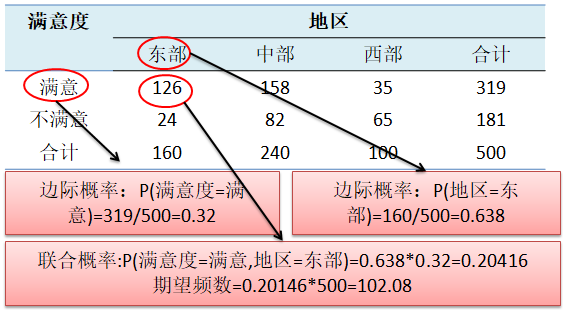

计算完成后，结果如下：

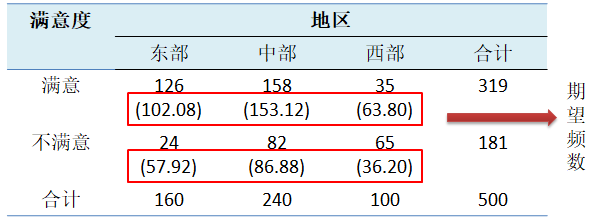

计算每个单元的$(f_0-f_e)^2/f_e$,求和后得到$\chi^2$统计量:
$$\chi^2=\frac{(126-102.08)^2}{102.08}+...+\frac{(65-36.20)^2}{36.20}=51.8266$$<p>
**第三步：做出决策**<br>
由于$\chi^2=51.8266$，自由度为(2-1)*(3-1)=2，根据Python函数计算P值为5.572e-12。由于P值< $\alpha=0.05$，拒绝$H_0$，认为满意度与地区不独立，或者说满意度与地区有关。<br>

In [5]:
import pandas as pd
from pandas import set_option
import numpy as np
#数据读入
df = pd.read_excel("data.xlsx",sheet_name = "8-3",index_col=0)
print(df)
from scipy.stats import chi2_contingency
res = chi2_contingency(np.array(df))
print(res)

      东部   中部  西部
满意   126  158  35
不满意   34   82  65
(51.82661055208206, 5.571787064349422e-12, 2, array([[102.08, 153.12,  63.8 ],
       [ 57.92,  86.88,  36.2 ]]))


【代码说明】
scipy库：https://docs.scipy.org/doc/scipy/index.html<p>
①scipy.stats.chi2_contingency(observed, correction=True, lambda_=None)
    
**作用：**<br>
对列联表进行变量独立性的卡方检验。

**主要输入参数：**<br>
* observed:列联表，该表包含每个类别中观察到的频率（即出现次数），在二维情况下，该表通常被描述为“R×C表”。array_like类型。
* correction:如果为 True，并且自由度为 1，则应用 Yates 校正以实现连续性。校正的效果是将每个观测值调整 0.5 以达到相应的期望值。bool类型。
* lambda_:默认情况下，此检验中计算的统计量是Pearson's卡方统计量，lambda_允许使用来自Cressie-Read power divergence的统计数据.float类型或str类型。

**返回：**<br>
res: Chi2ContingencyResult类型。该实例包括以下：
* statistic:检验统计量，float类型。
* pvalue:检验的p值，float类型。
* dof:自由度，int类型。
* expected_freq:基于列联表的边际和的期望频数，和observed相同的ndarray类型

### 8.3.2 应用$\chi^2$检验的注意事项
在应用$\chi^2$检验时，要求样本量应足够大，特别是每个单元格的期望频数不能太小，否则会得出错误的结论。<p>
从$\chi^2$统计量的形式$P(r_ic_j)=P(r_i)\times P(c_j) = (\frac{RT}{n})(\frac{CT}{n})$可以看出，如果期望频数太小，则$\chi^2$的值会较大，此时会导致拒绝原假设。因此：<p>
* 如果仅有两个单元格，那么单元格的期望频数不能小于5<br>
* 如果有两个以上的单元格，那么期望频数小于5的单元格数不能超过总数的20%


**【 chi_square test 卡方独立性检验，（先交叉表-独立性，拟合优度检验-先频数表）cross table】**

## 8.4 分类变量的相关性

### 8.4.1 $\phi$ 系数**和Cramer's V 系数
如果$\chi^2$独立性检验拒绝了原假设，则变量两个类别变量不独立，此时意味着其存在一定的相关性，那么如何度量相关行呢？可以用:$\phi$系数($\phi$ coefficient)，Crammer's V系数(Cramer's V coefficient)，列联系数(contingency coefficient)等进行度量。

**（1）$\phi$ 系数**
$$\phi=\sqrt{\frac{\chi^2}{n}}$$
式中，$\chi^2$是按照公式(2)计算的$\chi^2$值，n为列联表的总频数，即样本量。<p>
对于$2\times2$的列联表，$\phi$的取值在0-1之间，$\phi$值越接近1，表示两个变量的相关性越强；越接近0则越弱。<br>
对于行或列数大于2时，$\phi$会随着行列数的增进而变大，且没有边界，这时$\phi$的含义不易解释。<p>
根据例8-3的计算结果，得到满意度与地区之间的$\phi$系数为：
$$\phi=\sqrt{\frac{\chi^2}{n}}=\sqrt{\frac{51.8266}{500}}=0.321952$$

可见，满意度与地区之间的相关系数为0.321952，表示二者之间有一定的关系。

**（2）Cramer's V 系数**
$$V=\sqrt{\frac{\chi^2}{n\times min[(r-1),(c-1)]}}$$
式中，$\chi^2$是按照公式(2)计算的$\chi^2$值，n为列联表的总频数，即样本量；r是行数，c是列数，min[(r-1),(c-1)]表示(r-1)和(c-1)中较小的一个。<p>
Cramer's V的取值在(0，1)之间。Cramer's V值越接近1，表示两个变量的相关性越强；Cramer's V值越接近0，则越弱。如果行或列数其中一个为2，Cramer's V系数的值就等于$\phi$的值。<p>
根据例8-3的计算结果，得到满意度与地区之间的Cramer's V系数为：
$$V=\sqrt{\frac{\chi^2}{n\times min[(r-1),(c-1)]}}
	=\sqrt{\frac{51.8266}{500\times 1}} = 0.321952$$<br>
结果与$\phi$ 系数一致。

### 8.4.2 列联系数
列联系数主要用于大于2×2列联表的相关性度量，用C表示，计算公式如下：

$$C=\sqrt{\frac{\chi^2}{\chi^2+n}}$$

从公式可以看出，列联系数不可能大于1或等于1。当两个变量独立时，C=0，但即使两个变量完全相关，列联表系数不可能等于1。因此列联表系数解释也存在不足之处。

根据例8-3的计算结果，得到满意度与地区之间的C系数为：

$$$C=\sqrt{\frac{51.8266}{51.8266+500}}=0.306461$$

与前两个系数的结果相似，都显示满意度与地区之间存在一定的相关性。